# Imports and Custom Functions writen for convenience

## Importing Libraries

In [1]:
from rank_bm25 import BM25Okapi, BM25Plus, BM25L
from BM25_2 import BM25
from newap import average_precision, MAP
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Custom Functions and Location of data folder

In [2]:
loc = "../refining_seriously/"
def namestr(obj, namespace = globals()):
	return [name for name in namespace if namespace[name] is obj][0]
def print_json(query, n = 3, m = 5, k=6):
	n = 3
	print(f"{namestr(query)} = "+"{\n", end="")  # start of the json
	l = sorted(list(query.keys()),
			key=lambda x: int(x[k:]))
	for QID in l[:n]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	for i in range(2): print("\t...")
	for QID in l[-n:]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	print("}")  # end of the json

## Importing Data

In [3]:
# "cases.json" has the query and the doc_id of the relevant documents
with open(loc+"cases.json") as f:
    prior_cases = json.load(f)
print_json(prior_cases, k=1)

prior_cases = {
	"C1": ['masud', 'khan', 'v', 'state', 'uttar', ......],
	"C2": ['indian', 'oil', 'corpor', 'v', 'nepc', ......],
	"C3": ['gurpal', 'singh', 'v', 'state', 'punjab', ......],
	...
	...
	"C2912": ['dharangadhara', 'chemic', 'work', 'limit', 'v', ......],
	"C2913": ['central', 'bank', 'india', 'v', 'sethumadhavan', ......],
	"C2914": ['som', 'raj', 'soma', 'v', 'state', ......],
}


In [4]:
# "Query_doc.json" has all the queries (X)
with open(loc+"Query_doc.json") as f:
    query = json.load(f)
print_json(query)

query = {
	"AILA_Q1": ['appel', 'februari', 'appoint', 'offic', 'grade'] , ......],
	"AILA_Q2": ['appel', 'us', 'examin', 'prime', 'wit'] , ......],
	"AILA_Q3": ['appeal', 'aris', 'judgment', 'learn', 'singl'] , ......],
	...
	...
	"AILA_Q48": ['whether', 'sanction', 'requir', 'initi', 'crimin'] , ......],
	"AILA_Q49": ['appel', 'patwari', 'work', 'villag', 'v1'] , ......],
	"AILA_Q50": ['peculiar', 'featur', 'appeal', 'special', 'leav'] , ......],
}


In [5]:
# "answers.json" has the relevant documents (Y)
with open(loc+"answers.json") as f:
    answers = json.load(f)
print_json(answers, 3, 1)

answers = {
	"AILA_Q1": ['C14'] , ......],
	"AILA_Q2": ['C27'] , ......],
	"AILA_Q3": ['C1'] , ......],
	...
	...
	"AILA_Q48": ['C82'] , ......],
	"AILA_Q49": ['C174'] , ......],
	"AILA_Q50": ['C27'] , ......],
}


# Getting Data Ready

In [6]:
"""aaaa"""
# sorted list of all prior cases, corpus_index = ["C1", "C2", ..., "C2914"]
corpus_index = sorted(list(prior_cases.keys()),
                          key=lambda x: int(x[1:]))

# 2D list containing prior cases in order as in corpus_index
tokenized_corpus = [prior_cases[doc_id] for doc_id in corpus_index]

# sorted list of all queries, query_index = ["AILA_Q1", "AILA_Q2", ..., "AILA_Q59"]
query_index = sorted(list(query.keys()),
                     key=lambda x: int(x[6:]))

In [7]:
# Trial for a single Query over the corpus
bm25 = BM25Okapi(tokenized_corpus)
doc_scores = bm25.get_scores(query["AILA_Q10"])
# print(np.std(doc_scores))
# print(min(doc_scores))
# print(max(doc_scores))
# print(np.mean(doc_scores))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = attempt
q_freq = [0 0 0 ... 0 0 3]
q = caus
q_freq = [ 0 12  0 ...  0  0 69]
q = murder
q_freq = [ 0  0  0 ...  0  0 18]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = deshmukh
q_freq = [0 0 0 ... 0 0 0]
q = further
q_freq = [0 0 0 ... 0 0 0]
q = common
q_freq = [0 3 0 ... 0 0 1]
q = intent
q_freq = [ 0 25  1 ...  0  0 22]
q = therebi
q_freq = [0 7 0 ... 1 0 1]
q = commit
q_freq = [ 0 15  0 ...  0  0 11]
q = offenc
q_freq = [ 3 33  1 ...  0  0 24]
q = punish
q_freq = [0 3 0 ... 0 0 7]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = conclud
q_freq = [0 1 0 ... 0 0 1]
q = thu
q_freq = [1 2 1 ... 4 0 2]
q = five
q_freq = [0 0 1 ... 0 0 5]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = offenc
q_freq = [ 3 33  1 ...  0  0 24]
q = riot
q_freq = [0 0 0 ... 0 0 0]
q = punish
q_freq = [0 3 0 ... 0 0 7]

In [8]:
# Trial for a single Iteration
tx0 = time.time()
bm25 = BM25Okapi(tokenized_corpus, k1 = 0.5)
print("1 -", time.time()-tx0)
sum = 0
for i, Q in enumerate(query_index):
    tx0 = time.time()
    doc_scores = bm25.get_scores(query[Q])
    print(doc_scores)
    sum += average_precision(doc_scores, answers[Q])
    print("\t", i, "-", time.time()-tx0)
    # print(Q)
MeanAP = sum/len(query_index)
MeanAP*100

1 - 1.1900897026062012


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = section
q_freq = [ 0 21  3 ...  0  0 12]
q = a1
q_freq = [0 0 0 ... 0 0 0]
q = assess
q_freq = [0 1 0 ... 0 0 0]
q = loss
q_freq = [0 3 0 ... 0 0 0]
q = caus
q_freq = [ 0 12  0 ...  0  0 69]
q = societi
q_freq = [0 0 0 ... 1 0 0]
q = howev
q_freq = [1 8 2 ... 7 3 5]
q = govern
q_freq = [2 0 3 ... 4 2 0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = novemb
q_freq = [0 0 0 ... 3 0 0]
q = annul
q_freq = [0 0 0 ... 1 0 0]
q = registrar
q_freq = [0 0 0 ... 0 0 0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = april
q_freq = [0 0 0 ... 0 0 0]
q = octob
q_freq = [0 0 0 ... 1 0 0]
q = direct
q_freq = [0 3 4 ... 5 3 1]
q = fresh
q_freq = [0 3 1 ... 1 0 0]
q = inquiri
q_freq = [0 1 0 ... 0 0 0]
q = affair
q_freq = [1 0 1 ... 0 0 0]
q = societi
q_freq = [0 0 0 ... 1 0 0]
q = decemb
q_freq = [1 0 0 ... 0 0 0]
q = bank
q_freq = [0 2 0 ... 0 4 0]
q = issu
q_freq = [17  2  2 ...  2  3  1]
q = show
q_freq = [0 6 

q_freq = [0 0 0 ... 0 0 0]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = tribun
q_freq = [ 0  0  0 ... 20  0  0]
q = meantim
q_freq = [0 0 0 ... 0 0 0]
q = crimin
q_freq = [10 52  2 ...  0  0  6]
q = proceed
q_freq = [12 16  1 ...  6  0  1]
q = end
q_freq = [0 3 0 ... 4 0 2]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = vide
q_freq = [0 0 0 ... 2 0 0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = 27th
q_freq = [0 0 0 ... 0 0 0]
q = march
q_freq = [0 0 0 ... 0 1 0]
q = pass
q_freq = [0 1 2 ... 4 0 1]
q = addl
q_freq = [0 0 0 ... 0 0 0]
q = chief
q_freq = [0 0 0 ... 0 0 2]
q = metropolitan
q_freq = [0 0 0 ... 0 0 0]
q = magistr
q_freq = [2 9 0 ... 0 0 1]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = challeng
q_freq = [0 1 4 ... 0 0 0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = extract
q_freq = [0 3 0 ... 0 0 1]
q = illeg
q_freq = [1 0 1 ... 0 0 0]
q = gratif
q_freq = [0 0 0 ... 0 0 0]
q = rate
q_freq = [0 0 0 ... 2 2 0]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = er
q_freq = [0 0 0 ... 0 0 0]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = januari
q_freq = [0 0 0 ... 2 0 0]
q = februari
q_freq = [1 0 0 ... 0 0 1]
q = march
q_freq = [0 0 0 ... 0 1 0]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = sudden
q_freq = [0 0 0 ... 0 0 3]
q = rais
q_freq = [1 1 0 ... 2 0 1]
q = demand
q_freq = [0 0 0 ... 0 0 0]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = per
q_freq = [0 3 0 ... 9 0 0]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = april
q_freq = [0 0 0 ... 0 0 0]
q = led
q_freq = [0 0 0 ... 0 0 0]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = lay
q_freq = [0 0 0 ... 2 0 0]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = exhibit
q_freq = [0 0 0 ... 0 0 3]
q = superintend
q_freq = [0 0 0 .

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = acquitt
q_freq = [2 1 0 ... 0 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = no
q_freq = [0 1 0 ... 0 2 0]
q = therein
q_freq = [0 1 0 ... 2 0 1]
q = one
q_freq = [ 4  4  4 ... 12  3 10]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = us
q_freq = [0 1 0 ... 2 1 1]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = confirm
q_freq = [0 1 0 ... 0 0 4]
q = acquitt
q_freq = [2 1 0 ... 0 0 0]
q = second
q_freq = [ 1  5  0 ...  1  0 16]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = us
q_freq = [0 1 0 ... 2 1 1]
q = undergo
q_freq = [0 0 0 ... 0 0 2]
q = simpl
q_freq = [0 0 0 ... 0 0 1]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = six
q_freq = [0 0 0 ... 0 0 1]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = pay
q_freq = [ 0  7  0 ...  4 13  1]
q = fine
q_freq = [0 2 0 ... 1 0 2]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = default
q_freq = [0 4 0 ... 1 0 1]
q = senten

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = complaint
q_freq = [ 0 46  3 ...  0  0  1]
q = superintend
q_freq = [0 0 0 ... 7 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = l1
q_freq = [0 0 0 ... 0 0 0]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = crl
q_freq = [0 3 0 ... 0 0 0]
q = station
q_freq = [ 1  6  0 ...  0  0 10]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = offic
q_freq = [0 0 0 ... 3 3 4]
q = instruct
q_freq = [0 0 0 ... 2 0 0]
q = superintend
q_freq = [0 0 0 ... 7 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = upon
q_freq = [3 4 1 ... 3 0 5]
q = investig
q_freq = [0 3 0 ... 0 0 3]
q = complaint
q_freq = [ 0 46  3 ...  0  0  1]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = inspector
q_freq = [0 0 0 ... 0 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = charg
q_freq = [ 1 26  0 ...  1  0  1]
q = sheet
q_freq = [0 0 0 ... 0 0 0]
q = cc
q_freq 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = work
q_freq = [ 0  1  0 ... 69  0  0]
q = son
q_freq = [1 0 0 ... 0 0 0]
q = ask
q_freq = [0 0 0 ... 0 0 0]
q = cut
q_freq = [0 1 0 ... 0 6 7]
q = pulla
q_freq = [0 0 0 ... 0 0 0]
q = jointli
q_freq = [0 0 0 ... 0 0 0]
q = held
q_freq = [ 3 15  4 ...  3  1  7]
q = parti
q_freq = [3 3 0 ... 4 1 3]
q = wordi
q_freq = [0 0 0 ... 0 0 0]
q = alterc
q_freq = [0 0 0 ... 0 0 4]
q = ensu
q_freq = [0 0 0 ... 0 0 1]
q = parti
q_freq = [3 3 0 ... 4 1 3]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = insist
q_freq = [0 0 0 ... 0 0 0]
q = would
q_freq = [ 4  7  2 ...  8  0 22]
q = take
q_freq = [ 0 15  3 ...  5  1  0]
q = away
q_freq = [0 0 0 ... 1 0 6]
q = entir
q_freq = [0 2 0 ... 1 0 0]
q = pulla
q_freq = [0 0 0 ... 0 0 0]
q = fight
q_freq = [0 0 0 ... 0 1 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = person
q_freq = [ 3 38 14 ... 22  1 11]
q = start
q_freq = [0 0 2 ... 0 0 0]
q = inflict
q_freq = [ 0  0  0 ...  0  0 24]
q = injuri
q_freq = [ 0  3  1 ...  0  0 54]
q = complain
q_freq = [ 0 10  0 

q_freq = [0 0 0 ... 0 0 1]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = one
q_freq = [ 4  4  4 ... 12  3 10]
q = year
q_freq = [1 1 4 ... 2 4 3]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = second
q_freq = [ 1  5  0 ...  1  0 16]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = p5
q_freq = [0 0 0 ... 0 0 0]
q = impos
q_freq = [0 1 1 ... 0 0 1]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = five
q_freq = [0 0 1 ... 0 0 5]
q = year
q_freq = [1 1 4 ... 2 4 3]
q = well
q_freq = [ 2  2  2 ... 14  2  2]
q = fine
q_freq = [0 2 0 ... 1 0 2]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = confirm
q_freq = [0 1 0 ... 0 0 4]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = undergo
q_freq = [0 0 0 ... 0 0 2]
q = six
q_freq = [0 0 0 ... 0 0 1]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = rigor
q_freq = [0 0 0 ... 0 0 1]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = or

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = p4
q_freq = [0 0 0 ... 0 0 0]
q = si
q_freq = [0 0 0 ... 0 0 0]
q = p6
q_freq = [0 0 0 ... 0 0 0]
q = wait
q_freq = [0 0 0 ... 0 0 0]
q = along
q_freq = [0 1 0 ... 2 1 3]
q = staff
q_freq = [0 0 0 ... 1 0 0]
q = distanc
q_freq = [0 0 0 ... 0 0 0]
q = meter
q_freq = [0 0 0 ... 0 0 0]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = p5
q_freq = [0 0 0 ... 0 0 0]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = reach
q_freq = [2 1 0 ... 1 0 5]
q = near
q_freq = [0 0 0 ... 1 0 0]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = p5
q_freq = [0 0 0 ... 0 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = stand
q_freq = [1 0 5 ... 0 1 0]
q = outsid
q_freq = [0 1 1 ... 1 0 1]
q = room
q_freq = [1 1 0 ... 0 0 1]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = disclos
q_freq = [0 1 0 ... 0 0 1]
q = ident
q_freq = [0 0 0 ... 0 0 1]
q = ask
q_freq = [0 0 0 ... 0 0 0]
q = surrend
q_freq = [0 0 0 ... 0 0 0]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = instead
q_freq = [0 0 0 ... 0 0 1]
q = surrend
q_freq 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = one
q_freq = [ 4  4  4 ... 12  3 10]
q = year
q_freq = [1 1 4 ... 2 4 3]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = undergo
q_freq = [0 0 0 ... 0 0 2]
q = rigor
q_freq = [0 0 0 ... 0 0 1]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = one
q_freq = [ 4  4  4 ... 12  3 10]
q = year
q_freq = [1 1 4 ... 2 4 3]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = addit
q_freq = [0 2 0 ... 0 1 1]
q = pay
q_freq = [ 0  7  0 ...  4 13  1]
q = fine
q_freq = [0 2 0 ... 1 0 2]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = default
q_freq = [0 4 0 ... 1 0 1]
q = suffer
q_freq = [0 3 1 ... 0 0 5]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = period
q_freq = [0 0 0 ... 0 1 1]
q = two
q_freq = [ 3 18  1 ...  4  2  3]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = confirm
q_freq = [0 1 0 ... 0 0 4]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = court
q_freq = [ 8 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = parent
q_freq = [0 0 0 ... 0 0 0]
q = meet
q_freq = [0 0 0 ... 1 0 4]
q = household
q_freq = [0 0 0 ... 0 0 0]
q = expens
q_freq = [0 0 0 ... 2 1 0]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = purchas
q_freq = [0 0 0 ... 1 0 0]
q = manur
q_freq = [0 0 0 ... 0 0 0]
q = whenev
q_freq = [1 2 1 ... 0 0 1]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = went
q_freq = [4 0 0 ... 1 0 0]
q = parent
q_freq = [0 0 0 ... 0 0 0]
q = home
q_freq = [0 0 0 ... 0 0 0]
q = use
q_freq = [ 0 15  3 ...  2  0 14]
q = tell
q_freq = [0 0 0 ... 0 0 0]
q = parent
q_freq = [0 0 0 ... 0 0 0]
q = husband
q_freq = [0 0 0 ... 0 0 0]
q = mother
q_freq = [0 0 0 ... 0 0 0]
q = law
q_freq = [ 5 19  8 ...  9  1  0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = harass
q_freq = [0 1 0 ... 0 0 0]
q = use
q_freq = [ 0 15  3 ...  2  0 14]
q = occasion
q_freq = [0 0 0 ... 0 0 0]
q = beat
q_freq = [0 0 0 ... 0 0 0]
q = father
q_freq = [0 0 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = spot
q_freq = [0 0 0 ... 0 0 2]
q = forbad
q_freq = [0 0 0 ... 0 0 0]
q = complain
q_freq = [ 0 10  0 ...  0  0  3]
q = complain
q_freq = [ 0 10  0 ...  0  0  3]
q = insist
q_freq = [0 0 0 ... 0 0 0]
q = right
q_freq = [ 0 25  4 ...  9  0  0]
q = carri
q_freq = [0 4 0 ... 1 0 1]
q = work
q_freq = [ 0  1  0 ... 69  0  0]
q = field
q_freq = [0 0 0 ... 0 0 1]
q = belong
q_freq = [0 5 0 ... 1 0 0]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = accompani
q_freq = [0 0 0 ... 0 0 0]
q = son
q_freq = [1 0 0 ... 0 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = p5
q_freq = [0 0 0 ... 0 0 0]
q = abus
q_freq = [0 2 2 ... 0 0 1]
q = labour
q_freq = [0 0 0 ... 9 0 0]
q = drove
q_freq = [0 0 0 ... 0 0 0]
q = away
q_freq = [0 0 0 ... 1 0 6]
q = field
q_freq = [0 0 0 ... 0 0 1]
q = complain
q_freq = [ 0 10  0 ...  0  0  3]
q = took
q_freq = [0 2 0 ... 0 0 2]
q = strong
q_freq = [0 0 0 ... 0 0 0]
q = object
q_freq = [0 0 3 ... 0 0 3]
q = accus
q_freq = [ 3 27  0 ...  0

q_freq = [ 3 38 14 ... 22  1 11]
q = state
q_freq = [ 9 22  7 ...  5  5 28]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = session
q_freq = [0 0 0 ... 0 0 0]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = dismiss
q_freq = [1 0 3 ... 5 0 2]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = limin
q_freq = [0 0 0 ... 0 0 0]
q = make
q_freq = [ 0 15  0 ...  4  2  0]
q = follow
q_freq = [1 8 1 ... 3 2 6]
q = observ
q_freq = [0 4 0 ... 6 1 1]
q = regard
q_freq = [ 1  8  0 ... 11  6  2]
q = merit
q_freq = [0 2 0 ... 1 0 2]
q = clear
q_freq = [1 9 1 ... 0 1 0]
q = perus
q_freq = [0 0 0 ... 0 0 1]
q = record
q_freq = [ 1  0  3 ...  4  0 16]
q = wit
q_freq = [ 0  0  0 ...  0  0 20]
q = name
q_freq = [0 0 4 ... 1 1 7]
q = fardbayan
q_freq = [0 0 0 ... 0 0 0]
q = examin
q_freq = [ 0  3  1 ... 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = like
q_freq = [ 0  4  0 ...  1  0 15]
q = commit
q_freq = [ 0 15  0 ...  0  0 11]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = common
q_freq = [0 3 0 ... 0 0 1]
q = object
q_freq = [0 0 3 ... 0 0 3]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = assembl
q_freq = [0 0 0 ... 0 0 0]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = time
q_freq = [ 0 14  6 ...  3  0  1]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = attempt
q_freq = [0 0 0 ... 0 0 3]
q = caus
q_freq = [ 0 12  0 ...  0  0 69]
q = murder
q_freq = [ 0  0  0 ...  0  0 18]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = deshmukh
q_freq = [0 0 0 ... 0 0 0]
q = further
q_freq = [0 0 0 ... 0 0 0]
q = common
q_freq = [0 3 0 ... 0 0 1]
q = intent
q_freq = [ 0 25  1 ...  0  0 22]
q = therebi
q_freq = [0 7 0 ... 1 0 1]
q = commit
q_freq = [ 0 15  0 ...  0  0 11]
q = offenc
q_freq = [ 3 33  1 ...  0  0 24]
q = punish
q_freq = [0 3 0 ... 0 0 7]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = court
q_freq =

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = petit
q_freq = [ 1  3 24 ...  1  6  0]
q = writ
q_freq = [ 1  0 12 ...  5  3  0]
q = habea
q_freq = [0 0 0 ... 0 0 0]
q = corpu
q_freq = [0 0 0 ... 0 0 0]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = l2
q_freq = [0 0 0 ... 0 0 0]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = three
q_freq = [0 1 0 ... 0 0 6]
q = content
q_freq = [2 7 0 ... 2 0 5]
q = advanc
q_freq = [0 3 0 ... 1 0 2]
q = behalf
q_freq = [3 1 0 ... 2 1 2]
q = detenu
q_freq = [0 0 1 ... 0 0 0]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = solitari
q_freq = [0 0 0 ... 0 0 3]
q = incid
q_freq = [ 0  0  0 ...  0  0 13]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = pend
q_freq = [0 1 1 ... 2 0 0]
q = detent
q_freq = [0 0 1 ... 0 0 0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = mala
q_freq = [0 0 1 ... 0 0 0]
q = fide
q_freq = [0 0 2 ... 0 0 0]
q = serv
q_freq = [0 1 0 ... 0 0 3]
q = prevent
q_freq = [0 3 1 ... 0 0 2]
q = magistr

q_freq = [ 4  7  9 ... 10  0  4]
q = consid
q_freq = [4 2 1 ... 3 2 6]
q = represent
q_freq = [0 2 1 ... 0 0 0]
q = therebi
q_freq = [0 7 0 ... 1 0 1]
q = violat
q_freq = [0 6 1 ... 1 0 0]
q = constitut
q_freq = [1 9 1 ... 4 3 2]
q = guarante
q_freq = [0 0 0 ... 0 0 0]
q = even
q_freq = [3 6 4 ... 4 1 6]
q = detenu
q_freq = [0 0 1 ... 0 0 0]
q = alleg
q_freq = [ 3 33  3 ...  0  0  0]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = confession
q_freq = [0 0 0 ... 0 0 0]
q = statement
q_freq = [ 4  0  0 ...  1  0 31]
q = retract
q_freq = [0 0 0 ... 0 0 0]
q = detent
q_freq = [0 0 1 ... 0 0 0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = yet
q_freq = [0 0 2 ... 0 0 0]
q = noth
q_freq = [0 0 5 ... 1 0 1]
q = show
q_freq = [0 6 1 ... 0 0 0]
q = detain
q_freq = [0 3 0 ... 0 0 0]
q = author
q_freq = [0 2 1 ... 6 0 0]
q = took
q_freq = [0 2 0 ... 0 0 2]
q = consider
q_freq = [0 2 2 ... 6 0 1]
q = fact
q_freq = [ 5  8  0 ... 18  3 13]
q = confess
q_freq 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = brutal
q_freq = [0 0 0 ... 0 0 0]
q = murder
q_freq = [ 0  0  0 ...  0  0 18]
q = creat
q_freq = [ 0 16  1 ...  0  0  0]
q = feel
q_freq = [0 0 0 ... 0 0 0]
q = insecur
q_freq = [0 0 0 ... 0 0 0]
q = public
q_freq = [ 1  3 36 ...  0  0  3]
q = gener
q_freq = [0 3 0 ... 3 0 1]
q = among
q_freq = [0 1 1 ... 0 0 0]
q = doctor
q_freq = [0 0 0 ... 0 0 1]
q = particular
q_freq = [0 0 1 ... 2 0 8]
q = ground
q_freq = [3 8 0 ... 6 0 2]
q = detent
q_freq = [0 0 1 ... 0 0 0]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = detenu
q_freq = [0 0 1 ... 0 0 0]
q = district
q_freq = [1 0 0 ... 0 0 0]
q = jail
q_freq = [1 0 0 ... 0 0 0]
q = connect
q_freq = [0 0 0 ... 1 2 1]
q = crimin
q_freq = [10 52  2 ...  0  0  6]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = bail
q_freq = [0 0 0 ... 0 0 0]
q = got
q_freq = [0 1 0 ... 2 0 0]
q = bail
q_freq = [0 0 0 ... 0 0 0]
q = cancel
q_freq = [0 0 0 ... 0 0 0]
q = februari
q_freq = [1 0 0 ... 0 0 1]
q = tri
q_freq = [3 0 2 ... 1 0 3]
q = bail
q_freq = [0 0 0 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = administr
q_freq = [1 0 3 ... 0 0 0]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = judici
q_freq = [1 9 2 ... 0 0 0]
q = commission
q_freq = [0 4 0 ... 0 0 0]
q = l1
q_freq = [0 0 0 ... 0 0 0]
q = petit
q_freq = [ 1  3 24 ...  1  6  0]
q = writ
q_freq = [ 1  0 12 ...  5  3  0]
q = pray
q_freq = [1 0 0 ... 0 0 0]
q = writ
q_freq = [ 1  0 12 ...  5  3  0]
q = declar
q_freq = [0 1 0 ... 0 0 3]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = superintend
q_freq = [0 0 0 ... 7 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = termin
q_freq = [0 0 0 ... 0 0 0]
q = servic
q_freq = [ 3  0  8 ... 19  4  0]
q = illeg
q_freq = [1 0 1 ... 0 0 0]
q = writ
q_freq = [ 1  0 12 ...  5  3  0]
q = mandamu
q_freq = [0 0 0 ... 0 0 0]
q = writ
q_freq = [ 1  0 12 ...  5  3  0]
q = certiorari
q_freq = [0 0 0 ... 0 0 0]
q = direct
q_freq = [0 3 4 ... 5 3 1]
q = chief
q_freq = [0 0 0 ... 0 0 2]
q = commission
q_freq = [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = p4
q_freq = [0 0 0 ... 0 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = inflict
q_freq = [ 0  0  0 ...  0  0 24]
q = stab
q_freq = [0 0 0 ... 0 0 0]
q = injuri
q_freq = [ 0  3  1 ...  0  0 54]
q = knive
q_freq = [0 0 0 ... 0 0 0]
q = attempt
q_freq = [0 0 0 ... 0 0 3]
q = rescu
q_freq = [0 0 0 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = result
q_freq = [ 0  0  1 ...  1  0 11]
q = threat
q_freq = [0 0 0 ... 0 0 0]
q = whereupon
q_freq = [0 0 0 ... 0 0 3]
q = start
q_freq = [0 0 2 ... 0 0 0]
q = run
q_freq = [0 0 0 ... 1 0 2]
q = toward
q_freq = [0 1 0 ... 0 0 0]
q = jalgaon
q_freq = [0 0 0 ... 0 0 0]
q = bhaulal
q_freq = [0 0 0 ... 0 0 0]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = tri
q_freq = [3 0 2 ... 1 0 3]
q = save
q_freq = [0 0 0 ... 0 0 0]
q = run
q_freq = [0 0 0 ... 1 0 2]
q = away
q_freq = [0 0 0 ... 1 0 6]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = chase
q_freq = [0 0 0 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = even
q_freq = [3 6 4 ... 4 1 6]
q = basi
q_freq = [1 6 2 ... 2 1 1]
q = fir
q_freq = [0 0 0 ... 0 0 0]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = subsequ
q_freq = [6 6 0 ... 0 1 1]
q = five
q_freq = [0 0 1 ... 0 0 5]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = arrest
q_freq = [1 0 0 ... 0 0 0]
q = strength
q_freq = [0 0 0 ... 0 0 0]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = elicit
q_freq = [0 0 0 ... 0 0 0]
q = ist
q_freq = [0 0 0 ... 0 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = third
q_freq = [0 1 0 ... 0 0 4]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = weapon
q_freq = [0 0 2 ... 0 0 7]
q = offenc
q_freq = [ 3 33  1 ...  0  0 24]
q = recov
q_freq = [0 2 0 ... 0 0 1]
q = conceal
q_freq = [0 0 0 ... 0 0 0]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = import
q_freq = [0 0 0 ... 1 0 0]
q = wit
q_freq = [ 0  0  0 ... 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = p6
q_freq = [0 0 0 ... 0 0 0]
q = three
q_freq = [0 1 0 ... 0 0 6]
q = children
q_freq = [0 0 0 ... 0 0 0]
q = resid
q_freq = [0 0 0 ... 0 0 6]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = p7
q_freq = [0 0 0 ... 0 0 0]
q = p8
q_freq = [0 0 0 ... 0 0 0]
q = second
q_freq = [ 1  5  0 ...  1  0 16]
q = wife
q_freq = [0 0 0 ... 0 0 0]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = resid
q_freq = [0 0 0 ... 0 0 6]
q = alongwith
q_freq = [0 0 0 ... 0 0 1]
q = six
q_freq = [0 0 0 ... 0 0 1]
q = children
q_freq = [0 0 0 ... 0 0 0]
q = includ
q_freq = [0 3 1 ... 3 1 4]
q = daughter
q_freq = [0 0 0 ... 0 0 0]
q = p9
q_freq = [0 0 0 ... 0 0 0]
q = age
q_freq = [0 0 0 ... 0 0 0]
q = year
q_freq = [1 1 4 ... 2 4 3]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = w

	 15 - 1.364102840423584


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = obtain
q_freq = [0 1 0 ... 2 1 0]
q = statement
q_freq = [ 4  0  0 ...  1  0 31]
q = subsequ
q_freq = [6 6 0 ... 0 1 1]
q = arrest
q_freq = [1 0 0 ... 0 0 0]
q = offenc
q_freq = [ 3 33  1 ...  0  0 24]
q = princip
q_freq = [0 1 0 ... 1 0 0]
q = alleg
q_freq = [ 3 33  3 ...  0  0  0]
q = petition
q_freq = [16  0  6 ...  0  1  0]
q = detenu
q_freq = [0 0 1 ... 0 0 0]
q = misdeclar
q_freq = [0 0 0 ... 0 0 0]
q = bill
q_freq = [0 1 0 ... 0 0 0]
q = entri
q_freq = [0 0 0 ... 0 0 1]
q = petition
q_freq = [16  0  6 ...  0  1  0]
q = detenu
q_freq = [0 0 1 ... 0 0 0]
q = howev
q_freq = [1 8 2 ... 7 3 5]
q = remand
q_freq = [0 0 0 ... 0 0 0]
q = judici
q_freq = [1 9 2 ... 0 0 0]
q = custodi
q_freq = [0 1 0 ... 0 0 0]
q = subsequ
q_freq = [6 6 0 ... 0 1 1]
q = detenu
q_freq = [0 0 1 ... 0 0 0]
q = enlarg
q_freq = [0 0 0 ... 0 0 2]
q = bail
q_freq = [0 0 0 ... 0 0 0]
q = learn
q_freq = [ 2  4  3 ...  4  4 17]
q = addit
q_freq = [0 2 0 ... 0 1 1]
q = chief
q_freq = [0 0 0 ... 0 0 2]
q = metro

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = award
q_freq = [0 0 0 ... 0 0 0]
q = requir
q_freq = [0 5 0 ... 7 0 3]
q = compulsorili
q_freq = [0 0 0 ... 0 0 0]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q = sinc
q_freq = [0 0 4 ... 0 3 1]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q = inadmiss
q_freq = [0 0 0 ... 0 0 0]
q = evid
q_freq = [3 2 0 ... 7 0 5]
q = decis
q_freq = [ 7  9  3 ... 10  1  4]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = challeng
q_freq = [0 1 4 ... 0 0 0]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = way
q_freq = [0 6 0 ... 2 1 2]
q = civil
q_freq = [ 1 19  4 ...  1  7  1]
q = revis
q_freq = [0 1 1 ... 0 4 0]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = found
q_freq = [1 2 2 ... 4 0 8]
q = fact
q_freq = [ 5  8  0 ... 18  3 13]
q = circumst
q_freq = [0 1 0 ... 5 0 7]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = could
q_freq = [ 3  5  3 ...  3  0 13

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = receipt
q_freq = [0 5 0 ... 0 0 1]
q = ejahar
q_freq = [0 0 0 ... 0 0 0]
q = f
q_freq = [0 2 0 ... 0 1 0]
q = r
q_freq = [2 1 0 ... 9 0 0]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = station
q_freq = [ 1  6  0 ...  0  0 10]
q = start
q_freq = [0 0 2 ... 0 0 0]
q = investig
q_freq = [0 3 0 ... 0 0 3]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = arriv
q_freq = [0 0 0 ... 0 0 1]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = occurr
q_freq = [ 0  0  0 ...  0  0 18]
q = call
q_freq = [0 1 4 ... 2 0 1]
q = execut
q_freq = [0 4 2 ... 2 0 0]
q = magistr
q_freq = [2 9 0 ... 0 0 1]
q = prepar
q_freq = [1 0 0 ... 3 0 1]
q = inquest
q_freq = [0 0 0 ... 0 0 0]
q = dead
q_freq = [0 0 0 ... 0 0 1]
q = bodi
q_freq = [0 3 4 ... 0 0 3]
q = inquest
q_freq = [0 0 0 ... 0 0 0]
q = sent
q_freq = [0 1 0 ... 0 0 1]
q = post
q_freq = [0 0 1 ... 0 0 1]
q = mortem
q_freq = [0 0 0 ... 0 0 1]
q = examin
q_freq = [ 0  3  1 ...  2  0 27]
q = civil
q_freq = [ 1 19  4 ..

q_freq = [2 3 0 ... 2 1 0]
q = warrant
q_freq = [0 2 0 ... 0 0 0]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = person
q_freq = [ 3 38 14 ... 22  1 11]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = hand
q_freq = [ 0  5  0 ...  0  0 15]
q = overrul
q_freq = [0 0 0 ... 0 0 0]
q = decis
q_freq = [ 7  9  3 ... 10  1  4]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = five
q_freq = [0 0 1 ... 0 0 5]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = undergo
q_freq = [0 0 0 ... 0 0 2]
q = rigor
q_freq = [0 0 0 ... 0 0 1]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = life
q_freq = [0 0 1 ... 0 0 3]
q = pay
q_freq = [ 0  7  0 ...  4 13  1]
q = fine
q_freq = [0 2 0 ... 1 0 2]
q = rs
q_freq = [0 8 0 ... 2 1 1]
[144.37703112 200.2981189  148.49569126 ... 153.56630223  99.31517286
 272.35409351]
	 18 - 1.32310

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = hack
q_freq = [0 0 0 ... 0 0 0]
q = attempt
q_freq = [0 0 0 ... 0 0 3]
q = kill
q_freq = [0 0 0 ... 0 0 1]
q = inflict
q_freq = [ 0  0  0 ...  0  0 24]
q = sever
q_freq = [0 5 1 ... 0 0 0]
q = injuri
q_freq = [ 0  3  1 ...  0  0 54]
q = bodi
q_freq = [0 3 4 ... 0 0 3]
q = result
q_freq = [ 0  0  1 ...  1  0 11]
q = fell
q_freq = [0 0 0 ... 0 0 0]
q = rush
q_freq = [0 0 1 ... 0 0 0]
q = toward
q_freq = [0 1 0 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = sleep
q_freq = [0 0 0 ... 0 0 0]
q = hack
q_freq = [0 0 0 ... 0 0 0]
q = inflict
q_freq = [ 0  0  0 ...  0  0 24]
q = sever
q_freq = [0 5 1 ... 0 0 0]
q = injuri
q_freq = [ 0  3  1 ...  0  0 54]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = commit
q_freq = [ 0 15  0 ...  0  0 11]
q = offenc
q_freq = [ 3 33  1 ...  0  0 24]
q = escap
q_freq = [0 0 0 ... 0 0 0]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = occurr
q_freq = [ 0  0  0 ...  0  0 18]
q = bolt
q_freq = [0 0 0 ... 0 0 0]
q = door
q_freq = [0 0 1 ... 0 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = maintain
q_freq = [0 1 2 ... 3 0 0]
q = note
q_freq = [0 1 7 ... 1 1 1]
q = appoint
q_freq = [ 1  0 16 ...  1  0  0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = issu
q_freq = [17  2  2 ...  2  3  1]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = sponsor
q_freq = [0 0 0 ... 0 0 0]
q = employ
q_freq = [ 0  0  0 ... 26  0  1]
q = exchang
q_freq = [0 0 0 ... 0 0 2]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = note
q_freq = [0 1 7 ... 1 1 1]
q = claim
q_freq = [2 2 0 ... 1 1 0]
q = equal
q_freq = [0 0 0 ... 1 0 0]
q = work
q_freq = [ 0  1  0 ... 69  0  0]
q = equal
q_freq = [0 0 0 ... 1 0 0]
q = pay
q_freq = [ 0  7  0 ...  4 13  1]
q = maintain
q_freq = [0 1 2 ... 3 0 0]
q = daili
q_freq = [0 0 0 ... 0 0 1]
q = rate
q_freq = [0 0 0 ... 2 2 0]
q = person
q_freq = [ 3 38 14 ... 22  1 11]
q = requir
q_freq = [0 5 0 ... 7 0 3]
q = perform
q_freq = [0 0 0 ... 1 0 0]
q = duti
q_freq = [0 1 0 ... 0 0 0]
q = par
q_freq = [0 0 0 ... 0 0 0]
q = reg

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = sister
q_freq = [0 1 0 ... 0 0 0]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = solemn
q_freq = [0 0 0 ... 0 0 0]
q = marriag
q_freq = [0 1 0 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = stay
q_freq = [0 0 1 ... 2 0 0]
q = husband
q_freq = [0 0 0 ... 0 0 0]
q = mother
q_freq = [0 0 0 ... 0 0 0]
q = law
q_freq = [ 5 19  8 ...  9  1  0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = herein
q_freq = [1 4 0 ... 0 0 1]
q = matrimoni
q_freq = [0 0 0 ... 0 0 0]
q = home
q_freq = [0 0 0 ... 0 0 0]
q = wedlock
q_freq = [0 0 0 ... 0 0 0]
q = two
q_freq = [ 3 18  1 ...  4  2  3]
q = children
q_freq = [0 0 0 ... 0 0 0]
q = one
q_freq = [ 4  4  4 ... 12  3 10]
q = son
q_freq = [1 0 0 ... 0 0 0]
q = daughter
q_freq = [0 0 0 ... 0 0 0]
q = born
q_freq = [0 0 0 ... 1 0 1]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = brother
q

q_freq = [1 2 2 ... 4 0 8]
q = guilti
q_freq = [0 2 0 ... 0 0 0]
q = learn
q_freq = [ 2  4  3 ...  4  4 17]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = judg
q_freq = [2 1 1 ... 2 0 0]
q = answer
q_freq = [0 0 1 ... 0 0 3]
q = question
q_freq = [ 6  8  2 ... 16  2 12]
q = affirm
q_freq = [ 0  0  0 ...  1  0 11]
q = opin
q_freq = [0 0 1 ... 0 0 1]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = abl
q_freq = [0 0 0 ... 1 0 0]
q = prove
q_freq = [ 1  2  0 ...  1  0 10]
q = offenc
q_freq = [ 3 33  1 ...  0  0 24]
q = hilt
q_freq = [0 0 0 ... 0 0 0]
q = accordingli
q_freq = [0 2 0 ... 2 0 4]
q = impos
q_freq = [0 1 1 ... 0 0 1]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = state
q_freq = [ 9 22  7 ...  5  5 28]
q = hereinbefor
q_freq = [0 0 0 ... 0 0 0]
q = griev
q_freq = [0 0 0 ... 0 0 0]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = appel
q_freq = [  0  10  19 ...  29   8 105]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = time
q_freq = [ 0 14  6 ...  3  0  1]
q = furnish
q_freq = [0 1 0 ... 0 1 0]
q = bank
q_freq = [0 2 0 ... 0 4 0]
q = guarante
q_freq = [0 0 0 ... 0 0 0]
q = time
q_freq = [ 0 14  6 ...  3  0  1]
q = extend
q_freq = [0 1 1 ... 1 1 1]
q = vide
q_freq = [0 0 0 ... 2 0 0]
q = letter
q_freq = [0 0 0 ... 1 0 0]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = april
q_freq = [0 0 0 ... 0 0 0]
q = four
q_freq = [0 0 1 ... 2 0 1]
q = week
q_freq = [0 0 0 ... 0 1 0]
q = extens
q_freq = [0 0 0 ... 1 0 0]
q = pray
q_freq = [1 0 0 ... 0 0 0]
q = petition
q_freq = [16  0  6 ...  0  1  0]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = grant
q_freq = [0 1 0 ... 4 1 0]
q = juli
q_freq = [0 2 0 ... 0 0 0]
q = grant
q_freq = [0 1 0 ... 4 1 0]
q = extens
q_freq = [0 0 0 ... 1 0 0]
q = four
q_freq = [0 0 1 ... 2 0 1]
q = week
q_freq = [0 0 0 ... 0 1 0]
q = octob
q_freq = [0 0 0 ... 1 0 0]
q = return
q_freq = [0 0 0 ... 1 0 0]
q = estim
q_freq = [0 0 0 ... 0 0 0]
q = develop
q_freq = [0 0 1 ... 0 0 0]
q = s

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




self.idf = {'masud': 6.723660722781807, 'khan': 2.8361229660398255, 'v': 1.6741637961765992, 'state': 1.6741637961765992, 'uttar': 1.627661651390552, 'pradesh': 0.3933299031525266, 'suprem': 1.6741637961765992, 'court': 1.6741637961765992, 'india': 1.6741637961765992, 'septemb': 0.9627430289473651, 'writ': 0.4956682846383407, 'petit': 1.6741637961765992, 'judgment': 1.6741637961765992, 'deliv': 1.6741637961765992, 'alagiriswami': 6.270988431858299, 'j': 1.6741637961765992, 'petition': 0.7732316706723283, 'pray': 1.6863176395353818, 'releas': 1.5833193087778108, 'ground': 1.6741637961765992, 'indian': 0.023328673730747873, 'citizen': 2.0982971882721557, 'illeg': 0.9886261029053394, 'arrest': 1.3221360991063307, 'confin': 1.7420194870356571, 'jail': 2.159675581985736, 'paragraph': 1.4755114450694684, 'foreign': 2.6055488065988817, 'intern': 2.0263250220068887, 'order': 1.6741637961765992, 'come': 1.6741637961765992, 'pakistan': 4.902169185880277, 'basi': 1.6741637961765992, 'pakistani':

q_freq = [ 0  4  2 ...  1  1 16]
q = occurr
q_freq = [ 0  0  0 ...  0  0 18]
q = common
q_freq = [0 3 0 ... 0 0 1]
q = land
q_freq = [0 0 0 ... 2 0 4]
q = own
q_freq = [0 1 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = complain
q_freq = [ 0 10  0 ...  0  0  3]
q = parti
q_freq = [3 3 0 ... 4 1 3]
q = tube
q_freq = [0 0 0 ... 0 0 0]
q = well
q_freq = [ 2  2  2 ... 14  2  2]
q = pipe
q_freq = [0 0 0 ... 0 0 0]
q = taken
q_freq = [1 9 2 ... 1 5 5]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = common
q_freq = [0 3 0 ... 0 0 1]
q = piec
q_freq = [0 0 0 ... 2 0 0]
q = land
q_freq = [0 0 0 ... 2 0 4]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = hereinaft
q_freq = [0 0 0 ... 1 0 1]
q = refer
q_freq = [ 4 15  1 ... 10  1  5]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = stand
q_freq = [1 0 5 ... 0 1 0]
q = water
q_freq = [0 0 0 ... 6 0 0]
q = cours
q_freq = [ 0  0  0 ...  2  0 20]
q = point
q_freq = [5 8 1 ... 2 0 8]
q = b
q_freq =

q_freq = [0 0 0 ... 0 0 0]
q = area
q_freq = [0 0 0 ... 1 0 0]
q = scalp
q_freq = [0 0 0 ... 0 0 0]
q = left
q_freq = [0 0 0 ... 0 0 2]
q = occipit
q_freq = [0 0 0 ... 0 0 3]
q = area
q_freq = [0 0 0 ... 1 0 0]
q = medic
q_freq = [0 0 0 ... 0 0 5]
q = evid
q_freq = [3 2 0 ... 7 0 5]
q = corrobor
q_freq = [0 0 0 ... 0 0 0]
q = ocular
q_freq = [0 0 0 ... 0 0 0]
q = account
q_freq = [0 5 1 ... 3 0 0]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = took
q_freq = [0 2 0 ... 0 0 2]
q = note
q_freq = [0 1 7 ... 1 1 1]
q = fact
q_freq = [ 5  8  0 ... 18  3 13]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = member
q_freq = [0 0 1 ... 1 0 1]
q = complain
q_freq = [ 0 10  0 ...  0  0  3]
q = parti
q_freq = [3 3 0 ... 4 1 3]
q = relat
q_freq = [0 8 1 ... 6 0 2]
q = close
q_freq = [0 0 0 ... 1 0 0]
q = disput
q_freq = [0 8 0 ... 9 1 0]
q = aros
q_freq = [0 1 0 ... 2 0 1]
q = conflict
q_freq = [1 0 1 ... 0 0 0]
q = claim
q_freq = [2 2 0 ... 1 1 0]
q = owners

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = award
q_freq = [0 0 0 ... 0 0 0]
q = pray
q_freq = [1 0 0 ... 0 0 0]
q = refer
q_freq = [ 4 15  1 ... 10  1  5]
q = civil
q_freq = [ 1 19  4 ...  1  7  1]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = refer
q_freq = [ 4 15  1 ... 10  1  5]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = refer
q_freq = [ 4 15  1 ... 10  1  5]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = purport
q_freq = [0 0 0 ... 0 0 0]
q = reli
q_freq = [0 2 0 ... 2 0 0]
q = basi
q_freq = [1 6 2 ... 2 1 1]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = 30th
q_freq = [0 0 0 ... 0 0 0]
q = octob
q_freq = [0 0 0 ... 1 0 0]
q = 10th
q_freq = [0 0 0 ... 0 0 0]
q = novemb
q_freq = [0 0 0 ... 3 0 0]
q = pass
q_freq = [0 1 2 ... 4 0 1]
q = 4th
q_freq = [0 0 0 ... 1 0 0]
q = extra
q_freq = [0 0 0 ... 1 0 0]
q = assist
q_freq = [0 2 0 ... 3 0 0]
q = judg
q_freq = [2 1 1 ... 2 0 0]
q = 2nd
q_freq = [0 0 0 ... 0 0 0]
q = extra
q_freq = [0 0 0 ... 1 0 0]
q = assist
q_freq = [0 2 0 ... 3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = hous
q_freq = [0 0 0 ... 3 0 6]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = plot
q_freq = [0 0 0 ... 1 0 0]
q = loan
q_freq = [0 0 0 ... 0 0 0]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = sanction
q_freq = [0 0 0 ... 0 0 0]
q = favour
q_freq = [ 1 10  0 ...  0  1  1]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = construct
q_freq = [0 0 0 ... 0 0 0]
q = rule
q_freq = [1 0 4 ... 5 0 1]
q = govern
q_freq = [2 0 3 ... 4 2 0]
q = plan
q_freq = [0 0 0 ... 0 0 0]
q = estim
q_freq = [0 0 0 ... 0 0 0]
q = submit
q_freq = [0 1 4 ... 0 0 5]
q = along
q_freq = [0 1 0 ... 2 1 3]
q = applic
q_freq = [1 2 1 ... 4 0 4]
q = sanction
q_freq = [0 0 0 ... 0 0 0]
q = amount
q_freq = [ 1 16  3 ...  4  4 15]
q = paid
q_freq = [0 1 0 ... 8 1 0]
q = four
q_freq = [0 0 1 ... 2 0 1]
q = instal
q_freq = [0 4 0 ... 0 0 0]
q = differ
q_freq = [4 5 1 ... 3 2 2]
q = stage
q_freq = [0 2 0 ... 1 0 7]
q = construct
q_freq = [0 0 0 ... 0 0 0]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = start
q_freq = [0 0 2 ... 0 0 0]
q 

q = sole
q_freq = [0 1 0 ... 1 0 0]
q = arbitr
q_freq = [0 0 0 ... 0 0 0]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = publish
q_freq = [0 0 0 ... 0 0 0]
q = award
q_freq = [0 0 0 ... 0 0 0]
q = went
q_freq = [4 0 0 ... 1 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = accord
q_freq = [0 3 3 ... 3 0 5]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = award
q_freq = [0 0 0 ... 0 0 0]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = ex
q_freq = [0 0 0 ... 0 0 0]
q = part
q_freq = [ 0 12  0 ...  4  0 14]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = challeng
q_freq = [0 1 4 ... 0 0 0]
q = award
q_freq = [0 0 0 ... 0 0 0]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = objectionsbefor
q_freq = [0 0 0 ... 0 0 0]
q = learn
q_freq = [ 2  4  3 ...  4  4 17]
q = addit
q_freq = [0 2 0 ... 0 1 1]
q = district
q_freq = [1 0 0 ... 0 0 0]
q = judg
q_freq = [2 1 1 ... 2 0 0]
q = appli
q_freq = [2 3 0 ... 2 0 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = thereof
q_freq = [0 8 0 ... 0 0 2]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = per
q_freq = [0 3 0 ... 9 0 0]
q = kg
q_freq = [0 0 0 ... 0 0 0]
q = export
q_freq = [0 0 0 ... 0 0 0]
q = proce
q_freq = [0 6 0 ... 1 0 1]
q = actual
q_freq = [0 1 0 ... 1 0 1]
q = price
q_freq = [0 0 0 ... 0 0 0]
q = rout
q_freq = [0 0 0 ... 0 0 0]
q = channel
q_freq = [0 0 0 ... 0 0 0]
q = offic
q_freq = [0 0 0 ... 3 3 4]
q = director
q_freq = [0 2 0 ... 0 0 0]
q = revenu
q_freq = [0 0 1 ... 0 0 0]
q = intellig
q_freq = [0 0 0 ... 0 0 0]
q = dri
q_freq = [0 0 0 ... 0 0 0]
q = search
q_freq = [0 0 0 ... 0 0 0]
q = factori
q_freq = [0 0 0 ... 0 0 0]
q = well
q_freq = [ 2  2  2 ... 14  2  2]
q = residenti
q_freq = [0 0 0 ... 0 0 0]
q = premis
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = variou
q_freq = [0 1 1 ... 0 0 2]
q = incrimin
q_freq = [0 0 0 ... 0 0 0]
q = document
q_freq = [0 0 2 ... 0 0 0]
q = recov

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = p6
q_freq = [0 0 0 ... 0 0 0]
q = p7
q_freq = [0 0 0 ... 0 0 0]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = along
q_freq = [0 1 0 ... 2 1 3]
q = two
q_freq = [ 3 18  1 ...  4  2  3]
q = other
q_freq = [0 2 5 ... 4 1 4]
q = assault
q_freq = [0 0 0 ... 0 0 3]
q = brother
q_freq = [ 0  0  0 ...  0  0 12]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = spear
q_freq = [0 0 0 ... 0 0 0]
q = therebi
q_freq = [0 7 0 ... 1 0 1]
q = sever
q_freq = [0 5 1 ... 0 0 0]
q = injur
q_freq = [0 0 0 ... 0 0 2]
q = plough
q_freq = [0 0 0 ... 0 0 0]
q = field
q_freq = [0 0 0 ... 0 0 1]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = state
q_freq = [ 9 22  7 ...  5  5 28]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = taken
q_freq = [1 9 2 ... 1 5 5]
q = hospit
q_freq = [0 0 0 ... 0 0 3]
q = treatment
q_freq = [0 0 0 ... 0 0 2]
q = die
q_freq = [0 0 0 ... 0 0 0]
q = accordingli
q_freq = [0 2 0 ... 2 0 4]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q =

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = hous
q_freq = [0 0 0 ... 3 0 6]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = friend
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = coupl
q_freq = [0 0 0 ... 0 0 1]
q = came
q_freq = [1 1 3 ... 2 0 1]
q = back
q_freq = [0 2 1 ... 0 0 5]
q = l1
q_freq = [0 0 0 ... 0 0 0]
q = famili
q_freq = [0 2 0 ... 3 0 1]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = coupl
q_freq = [0 0 0 ... 0 0 1]
q = went
q_freq = [4 0 0 ... 1 0 0]
q = l2
q_freq = [0 0 0 ... 0 0 0]
q = attend
q_freq = [0 0 0 ... 0 0 2]
q = marriag
q_freq = [0 1 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = one
q_freq = [ 4  4  4 ... 12  3 10]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = schedul
q_freq = [0 6 0 ... 0 0 0]
q = held
q_freq = [ 3 15  4 ...  3  1  7]
q = return
q_freq = [0 0 0 ... 1 0 0]
q = l1
q_freq = [0 0 0 ... 0 0 0]
q = p
q_freq = [ 3 10  0 ...  1  4  6]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = left
q_fre

q_freq = [0 0 1 ... 0 0 0]
q = except
q_freq = [0 0 1 ... 0 0 2]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = procur
q_freq = [0 0 0 ... 0 0 0]
q = cyanid
q_freq = [0 0 0 ... 0 0 0]
q = poison
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = persuad
q_freq = [0 0 0 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = take
q_freq = [ 0 15  3 ...  5  1  0]
q = garb
q_freq = [0 0 0 ... 0 0 0]
q = oral
q_freq = [0 0 0 ... 1 0 0]
q = contracept
q_freq = [0 0 0 ... 0 0 0]
q = question
q_freq = [ 6  8  2 ... 16  2 12]
q = di
q_freq = [0 0 0 ... 0 0 0]
q = believ
q_freq = [0 1 0 ... 0 0 0]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = wit
q_freq = [ 0  0  0 ...  0  0 20]
q = includ
q_freq = [0 3 1 ... 3 1 4]
q = parent
q_freq = [0 0 0 ... 0 0 0]
q = sister
q_freq = [0 1 0 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = sent
q_freq = [0 1 0 ... 0 0 1]
q = news
q_freq = [0 0 0 ... 0 0 0]
q = parent
q_freq = [0 0 0 ... 0 0 0]
q = resid
q_freq = [0 0 0 ... 0 0 6]
q = neighbor
q_freq = [0 0 0 ... 0 0 0]
q = villag
q_freq = [0 0 0 ... 2 0 1]
q = distanc
q_freq = [0 0 0 ... 0 0 0]
q = half
q_freq = [0 0 0 ... 1 1 0]
q = kilomet
q_freq = [0 0 0 ... 0 0 0]
q = father
q_freq = [0 0 0 ... 0 0 0]
q = mother
q_freq = [0 0 0 ... 0 0 0]
q = uncl
q_freq = [0 0 0 ... 0 0 3]
q = thu
q_freq = [1 2 1 ... 4 0 2]
q = came
q_freq = [1 1 3 ... 2 0 1]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = occurr
q_freq = [ 0  0  0 ...  0  0 18]
q = door
q_freq = [0 0 1 ... 0 0 0]
q = open
q_freq = [0 0 1 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = taken
q_freq = [1 9 2 ... 1 5 5]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = narrat
q_freq = [0 1 0 ... 1 0 7]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = incid
q_freq = [ 0  0  0 ...  0  0 13]
q = parent
q_freq = [0 0 0 ... 0 0 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = plot
q_freq = [0 0 0 ... 1 0 0]
q = disput
q_freq = [0 8 0 ... 9 1 0]
q = area
q_freq = [0 0 0 ... 1 0 0]
q = bigha
q_freq = [0 0 0 ... 0 0 0]
q = plot
q_freq = [0 0 0 ... 1 0 0]
q = area
q_freq = [0 0 0 ... 1 0 0]
q = bigha
q_freq = [0 0 0 ... 0 0 0]
q = biswa
q_freq = [0 0 0 ... 0 0 0]
q = situat
q_freq = [0 2 1 ... 0 0 1]
q = villag
q_freq = [0 0 0 ... 2 0 1]
q = thereaft
q_freq = [0 0 0 ... 0 0 0]
q = forg
q_freq = [0 0 0 ... 0 0 0]
q = power
q_freq = [0 5 0 ... 4 0 0]
q = attorney
q_freq = [0 0 0 ... 0 0 0]
q = got
q_freq = [0 1 0 ... 2 0 0]
q = execut
q_freq = [0 4 2 ... 2 0 0]
q = favour
q_freq = [ 1 10  0 ...  0  1  1]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = allegedli
q_freq = [0 0 0 ... 0 0 0]
q = execut
q_freq = [0 4 2 ... 2 0 0]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = ground
q_freq = [3 8 0 ... 6 0 2]
q = forg
q_freq = [0 0 0 ... 0 0 0]
q = power
q_freq = [0 5 0 ... 4 0 0]
q = attorney
q_freq = [0 0 0 ... 0 0 0]
q = p1
q_freq = [0 0 0 ... 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = complaint
q_freq = [ 0 46  3 ...  0  0  1]
q = respect
q_freq = [ 0 12  0 ...  4  0  3]
q = behaviour
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = return
q_freq = [0 0 0 ... 1 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = station
q_freq = [ 1  6  0 ...  0  0 10]
q = waylaid
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = arm
q_freq = [0 0 1 ... 0 0 0]
q = iron
q_freq = [0 0 0 ... 0 0 4]
q = rod
q_freq = [0 0 0 ... 0 0 1]
q = other
q_freq = [0 2 5 ... 4 1 4]
q = stick
q_freq = [0 0 0 ... 0 0 0]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = attack
q_freq = [0 0 1 ... 0 0 0]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = weapon
q_freq = [0 0 2 ... 0 0 7]
q = becam
q_freq = [0 2 0 ... 0 0 0]
q = unconsci
q_freq = [0 0 0 ... 0 0 0]
q = fell
q_freq = [0 0 0 ... 0 0 0]
q = ground
q_freq = [3 8 0 ... 6 0 2]
q = thereaft
q_freq = [0 0 0 ... 0 0 0]
q = remov
q_freq = [ 0 14  0 ...  1  0  0]
q =

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = head
q_freq = [ 0  0  0 ...  0  0 16]
q = constabl
q_freq = [3 0 0 ... 0 0 3]
q = salari
q_freq = [0 0 0 ... 0 0 0]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = per
q_freq = [0 3 0 ... 9 0 0]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = offici
q_freq = [0 0 3 ... 0 0 0]
q = sub
q_freq = [1 0 0 ... 0 1 0]
q = inspector
q_freq = [0 0 0 ... 0 0 0]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = sometim
q_freq = [0 0 0 ... 1 0 1]
q = salari
q_freq = [0 0 0 ... 0 0 0]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = per
q_freq = [0 3 0 ... 9 0 0]
q = month
q_freq = [0 0 1 ... 2 4 0]
q = march
q_freq = [0 0 0 ... 0 1 0]
q = revert
q_freq = [0 0 0 ... 0 0 0]
q = post
q_freq = [0 0 1 ... 0 0 1]
q = head
q_freq = [ 0  0  0 ...  0  0 16]
q = constabl
q_freq = [3 0 0 ... 0 0 3]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = februari
q_freq = [1 0 0 ... 0 0 1]
q = septemb
q_freq = [1 0 0 ... 1 0 0]
q = post
q_freq = [0 0 1 ... 0 0 1]
q = head
q_freq = [ 0  0  0 ...  0  0 16]
q = constabl
q_freq = [3 0 0 ... 0 0 3]
q

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = investig
q_freq = [0 3 0 ... 0 0 3]
q = earlier
q_freq = [3 0 0 ... 0 0 0]
q = petit
q_freq = [ 1  3 24 ...  1  6  0]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = direct
q_freq = [0 3 4 ... 5 3 1]
q = investig
q_freq = [0 3 0 ... 0 0 3]
q = shall
q_freq = [0 4 0 ... 2 7 2]
q = monitor
q_freq = [0 0 1 ... 0 0 0]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = indic
q_freq = [0 0 3 ... 0 0 0]
q = cbi
q_freq = [0 0 0 ... 0 0 0]
q = offic
q_freq = [0 0 0 ... 3 3 4]
q = entrust
q_freq = [ 0 25  0 ...  2  0  0]
q = investig
q_freq = [0 3 0 ... 0 0 3]
q = shall
q_freq = [0 4 0 ... 2 7 2]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = chief
q_freq = [0 0 0 ... 0 0 2]
q = justic
q_freq = [0 1 5 ... 3 0 2]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = time
q_freq = [ 0 14  6 ...  3  0 

q_freq = [ 4  0  0 ...  0  0 17]
q = experi
q_freq = [0 0 0 ... 0 0 0]
q = conduct
q_freq = [0 2 0 ... 0 0 2]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = accord
q_freq = [0 3 3 ... 3 0 5]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = done
q_freq = [ 1  0  1 ... 15  0  1]
q = fag
q_freq = [0 0 0 ... 0 0 0]
q = end
q_freq = [0 3 0 ... 4 0 2]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = help
q_freq = [0 0 0 ... 2 0 3]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = petition
q_freq = [16  0  6 ...  0  1  0]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = alleg
q_freq = [ 3 33  3 ...  0  0  0]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = act
q_freq = [ 3 11  7 ... 15  1  8]
q = arbitrarili
q_freq = [0 0 0 ... 0 0 0]
q = interf
q_freq = [0 1 1 ... 1 0 0]
q = judici
q_freq = [1 9 2 ... 0 0 0]
q = process
q_freq = [1 3 5 ... 4 1 4]
q = benefit
q_freq = [0 3 0 ... 0 4 1]
q = respond
q_freq = [ 3 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = conduct
q_freq = [0 2 0 ... 0 0 2]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = howev
q_freq = [1 8 2 ... 7 3 5]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = persuad
q_freq = [0 0 0 ... 0 0 0]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = return
q_freq = [0 0 0 ... 1 0 0]
q = underwear
q_freq = [0 0 0 ... 0 0 0]
q = wit
q_freq = [ 0  0  0 ...  0  0 20]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = p
q_freq = [ 3 10  0 ...  1  4  6]
q = day
q_freq = [0 0 1 ... 8 1 2]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = accompani
q_freq = [0 0 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = p5
q_freq = [0 0 0 ... 0 0 0]
q = visit
q_freq = [0 0 0 ... 0 0 1]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = wit
q_freq = [ 0  0  0 ...  0  0 20]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = settl
q_freq = [1 1 1 ... 2 1 0]
q = detail
q_freq = [0 2 0 ... 0

q_freq = [ 0 12  0 ...  1  0 10]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = unworthi
q_freq = [0 0 0 ... 0 0 0]
q = credit
q_freq = [0 3 0 ... 1 0 0]
q = held
q_freq = [ 3 15  4 ...  3  1  7]
q = evid
q_freq = [3 2 0 ... 7 0 5]
q = two
q_freq = [ 3 18  1 ...  4  2  3]
q = wit
q_freq = [ 0  0  0 ...  0  0 20]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = p6
q_freq = [0 0 0 ... 0 0 0]
q = reliabl
q_freq = [0 1 0 ... 0 0 0]
q = born
q_freq = [0 0 0 ... 1 0 1]
q = part
q_freq = [ 0 12  0 ...  4  0 14]
q = statement
q_freq = [ 4  0  0 ...  1  0 31]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = howev
q_freq = [1 8 2 ... 7 3 5]
q = reject
q_freq = [1 3 1 ... 1 0 0]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = caus
q_freq = [ 0 12  0 ...  0  0 69]
q = injuri
q_freq = [ 0  3  1 ...  0 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




self.idf = {'masud': 6.723660722781807, 'khan': 2.8361229660398255, 'v': 1.6741637961765992, 'state': 1.6741637961765992, 'uttar': 1.627661651390552, 'pradesh': 0.3933299031525266, 'suprem': 1.6741637961765992, 'court': 1.6741637961765992, 'india': 1.6741637961765992, 'septemb': 0.9627430289473651, 'writ': 0.4956682846383407, 'petit': 1.6741637961765992, 'judgment': 1.6741637961765992, 'deliv': 1.6741637961765992, 'alagiriswami': 6.270988431858299, 'j': 1.6741637961765992, 'petition': 0.7732316706723283, 'pray': 1.6863176395353818, 'releas': 1.5833193087778108, 'ground': 1.6741637961765992, 'indian': 0.023328673730747873, 'citizen': 2.0982971882721557, 'illeg': 0.9886261029053394, 'arrest': 1.3221360991063307, 'confin': 1.7420194870356571, 'jail': 2.159675581985736, 'paragraph': 1.4755114450694684, 'foreign': 2.6055488065988817, 'intern': 2.0263250220068887, 'order': 1.6741637961765992, 'come': 1.6741637961765992, 'pakistan': 4.902169185880277, 'basi': 1.6741637961765992, 'pakistani':

q_freq = [0 0 0 ... 0 0 0]
q = surgeri
q_freq = [0 0 0 ... 0 0 0]
q = hospit
q_freq = [0 0 0 ... 0 0 3]
q = h1
q_freq = [0 0 0 ... 0 0 0]
q = admit
q_freq = [0 1 0 ... 0 0 3]
q = 19th
q_freq = [0 0 0 ... 0 0 0]
q = june
q_freq = [0 0 0 ... 1 0 0]
q = sum
q_freq = [0 4 0 ... 1 0 0]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = incur
q_freq = [0 0 0 ... 1 1 1]
q = way
q_freq = [0 6 0 ... 2 1 2]
q = medic
q_freq = [0 0 0 ... 0 0 5]
q = expens
q_freq = [0 0 0 ... 2 1 0]
q = claim
q_freq = [2 2 0 ... 1 1 0]
q = imburs
q_freq = [0 0 0 ... 0 0 0]
q = thereof
q_freq = [0 8 0 ... 0 0 2]
q = state
q_freq = [ 9 22  7 ...  5  5 28]
q = s1
q_freq = [0 0 0 ... 0 0 0]
q = sanction
q_freq = [0 0 0 ... 0 0 0]
q = reimburs
q_freq = [0 0 0 ... 0 0 0]
q = sum
q_freq = [0 4 0 ... 1 0 0]
q = rs
q_freq = [0 8 0 ... 2 1 1]
q = feel
q_freq = [0 0 0 ... 0 0 0]
q = aggriev
q_freq = [0 0 0 ... 0 1 0]
q = writ
q_freq = [ 1  0 12 ...  5  3  0]
q = petit
q_freq = [ 1  3 24 ...  1  6

q_freq = [1 8 2 ... 7 3 5]
q = sanction
q_freq = [0 0 0 ... 0 0 0]
q = state
q_freq = [ 9 22  7 ...  5  5 28]
q = rajasthan
q_freq = [0 0 0 ... 0 0 0]
q = admiss
q_freq = [0 0 0 ... 0 0 0]
q = purport
q_freq = [0 0 0 ... 0 0 0]
q = term
q_freq = [ 0 13  2 ...  5  1  2]
q = rule
q_freq = [1 0 4 ... 5 0 1]
q = feel
q_freq = [0 0 0 ... 0 0 0]
q = aggriev
q_freq = [0 0 0 ... 0 1 0]
q = writ
q_freq = [ 1  0 12 ...  5  3  0]
q = petit
q_freq = [ 1  3 24 ...  1  6  0]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = rajasthan
q_freq = [0 0 0 ... 0 0 0]
q = reason
q_freq = [2 1 0 ... 3 0 2]
q = impugn
q_freq = [0 0 2 ... 0 0 0]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = allow
q_freq = [0 4 5 ... 5 0 2]
q = direct
q_freq = [0 3 4 ... 5 3 1]
q = result
q_freq = [ 0  0  1 ...  1  0 11]
q = aforesaid
q_freq = [ 0  0  2 ...  0  0 18]
q = discuss
q_freq = [0 1 0 ... 0 0 0]
q 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = lodg
q_freq = [0 0 0 ... 0 0 1]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = record
q_freq = [ 1  0  3 ...  4  0 16]
q = accord
q_freq = [0 3 3 ... 3 0 5]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = son
q_freq = [1 0 0 ... 0 0 0]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = wife
q_freq = [0 0 0 ... 0 0 0]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = sit
q_freq = [0 0 0 ... 0 0 0]
q = courtyard
q_freq = [0 0 0 ... 0 0 2]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = p2
q_freq = [0 0 0 ... 0 0 0]
q = hereinaft
q_freq = [0 0 0 ... 1 0 1]
q = refer
q_freq = [ 4 15  1 ... 10  1  5]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = come
q_freq = [2 2 1 ... 6 0 2]
q = villag
q_freq = [0 0 0 ... 2 0 1]
q = purchas
q_freq = [0 0 0 ... 1 0 0]
q = veget
q_freq = [0 0 0 ... 0 0 0]
q = reach
q_freq = [2 1 0 ... 1 0 5]
q = near
q_freq = [0 0 0 ... 1 0 0]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = p4
q_freq = [0 0 0 ..

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = challeng
q_freq = [0 1 4 ... 0 0 0]
q = valid
q_freq = [0 0 0 ... 0 0 0]
q = claus
q_freq = [ 0  1  0 ...  0  1 11]
q = fertil
q_freq = [0 0 0 ... 0 0 0]
q = control
q_freq = [ 1  1  0 ... 23  0  0]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = sinc
q_freq = [0 0 4 ... 0 3 1]
q = claus
q_freq = [ 0  1  0 ...  0  1 11]
q = permit
q_freq = [1 0 0 ... 0 0 2]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = right
q_freq = [ 0 25  4 ...  9  0  0]
q = adduc
q_freq = [0 0 0 ... 0 0 0]
q = evid
q_freq = [3 2 0 ... 7 0 5]
q = contradict
q_freq = [0 0 0 ... 0 0 0]
q = report
q_freq = [0 0 1 ... 1 5 3]
q = public
q_freq = [ 1  3 36 ...  0  0  3]
q = analyst
q_freq = [0 0 0 ... 0 0 0]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = claus
q_freq = [ 0  1  0 ...  0  1 11]
q = ultra
q_freq = [0 0 0 ... 0 0 0]
q = vire
q_freq = [0 0 0 ... 1 0 0]
q = articl
q_freq = [0 1 0 ... 0 3 0]
q = constitut
q_freq = [1 9

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = inform
q_freq = [1 0 3 ... 0 0 8]
q = report
q_freq = [0 0 1 ... 1 5 3]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = gone
q_freq = [1 0 0 ... 0 0 3]
q = perform
q_freq = [0 0 0 ... 1 0 0]
q = pooja
q_freq = [0 0 0 ... 0 0 0]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = floor
q_freq = [0 0 0 ... 0 0 0]
q = hous
q_freq = [0 0 0 ... 3 0 6]
q = got
q_freq = [0 1 0 ... 2 0 0]
q = foul
q_freq = [0 0 0 ... 0 0 0]
q = smell
q_freq = [0 0 0 ... 0 0 0]
q = last
q_freq = [0 0 0 ... 0 0 1]
q = room
q_freq = [1 1 0 ... 0 0 1]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = floor
q_freq = [0 0 0 ... 0 0 0]
q = found
q_freq = [1 2 2 ... 4 0 8]
q = blood
q_freq = [0 0 0 ... 0 0 3]
q = seep
q_freq = [0 0 0 ... 0 0 0]
q = front
q_freq = [0 0 0 ... 0 0 1]
q = door
q_freq = [0 0 1 ... 0 0 0]
q = open
q_freq = [0 0 1 ... 0 0 0]
q = window
q_freq = [0 0 0 ... 0 0 0]
q = notic
q_freq = [0 3 2 ... 0 0 3]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = lie
q_freq = [3 2 1 ... 3 0 2]
q = pool
q_freq = [0 0 0 ... 0 0 1

q_freq = [ 3 27  0 ...  0  0 86]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = reli
q_freq = [0 2 0 ... 2 0 0]
q = upon
q_freq = [3 4 1 ... 3 0 5]
q = alleg
q_freq = [ 3 33  3 ...  0  0  0]
q = motiv
q_freq = [0 1 6 ... 0 0 0]
q = effect
q_freq = [2 1 2 ... 1 2 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = urgent
q_freq = [0 0 0 ... 0 0 0]
q = want
q_freq = [0 0 0 ... 0 0 0]
q = money
q_freq = [0 6 1 ... 0 0 0]
q = view
q_freq = [1 9 0 ... 3 8 6]
q = increas
q_freq = [0 0 0 ... 0 0 0]
q = mark
q_freq = [0 0 0 ... 0 0 0]
q = mathemat
q_freq = [0 0 0 ... 0 0 0]
q = therefor
q_freq = [5 9 3 ... 6 1 7]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = stolen
q_freq = [0 0 0 ... 0 0 0]
q = articl
q_freq = [0 1 0 ... 0 3 0]
q = belong
q_freq = [0 5 0 ... 1 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = found
q_freq = [1 2 2 ... 4 0 8]
q = respond
q_freq = [ 3 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = initi
q_freq = [0 5 1 ... 1 0 1]
q = grade
q_freq = [0 0 0 ... 0 0 0]
q = iii
q_freq = [0 4 1 ... 1 0 1]
q = post
q_freq = [0 0 1 ... 0 0 1]
q = law
q_freq = [ 5 19  8 ...  9  1  0]
q = offic
q_freq = [0 0 0 ... 3 3 4]
q = cum
q_freq = [0 1 0 ... 0 0 0]
q = draftsman
q_freq = [0 0 0 ... 0 0 0]
q = thereaft
q_freq = [0 0 0 ... 0 0 0]
q = grade
q_freq = [0 0 0 ... 0 0 0]
q = ii
q_freq = [0 9 1 ... 0 0 7]
q = grade
q_freq = [0 0 0 ... 0 0 0]
q = offic
q_freq = [0 0 0 ... 3 3 4]
q = judici
q_freq = [1 9 2 ... 0 0 0]
q = servic
q_freq = [ 3  0  8 ... 19  4  0]
q = direct
q_freq = [0 3 4 ... 5 3 1]
q = scale
q_freq = [0 0 0 ... 0 2 0]
q = pay
q_freq = [ 0  7  0 ...  4 13  1]
q = grade
q_freq = [0 0 0 ... 0 0 0]
q = ii
q_freq = [0 9 1 ... 0 0 7]
q = law
q_freq = [ 5 19  8 ...  9  1  0]
q = offic
q_freq = [0 0 0 ... 3 3 4]
q = cum
q_freq = [0 1 0 ... 0 0 0]
q = draftsman
q_freq = [0 0 0 ... 0 0 0]
q = shall
q_freq = [0 4 0 ... 2 7 2]
q = grade
q_freq = [0 0 0 ... 0 0 0]
q = ii
q_freq = [0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = sit
q_freq = [0 0 0 ... 0 0 0]
q = eastern
q_freq = [0 0 0 ... 0 0 0]
q = side
q_freq = [0 0 0 ... 1 0 8]
q = culvert
q_freq = [0 0 0 ... 0 0 0]
q = tube
q_freq = [0 0 0 ... 0 0 0]
q = light
q_freq = [0 0 0 ... 1 0 0]
q = burn
q_freq = [0 0 0 ... 0 0 0]
q = henc
q_freq = [0 0 0 ... 0 1 0]
q = enough
q_freq = [1 0 0 ... 0 0 0]
q = light
q_freq = [0 0 0 ... 1 0 0]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = time
q_freq = [ 0 14  6 ...  3  0  1]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = came
q_freq = [1 1 3 ... 2 0 1]
q = bicycl
q_freq = [0 0 0 ... 0 0 0]
q = proceed
q_freq = [12 16  1 ...  6  0  1]
q = east
q_freq = [0 0 0 ... 0 0 0]
q = west
q_freq = [0 0 0 ... 0 0 0]
q = took
q_freq = [0 2 0 ... 0 0 2]
q = turn
q_freq = [0 1 0 ... 1 0 0]
q = toward
q_freq = [0 1 0 ... 0 0 0]
q = south
q_freq = [0 0 0 ... 0 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = rush
q_freq = [0 0 1 ... 0 0 0]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = say
q_freq = [1 0 0 ... 3 0 3]
q = d

q_freq = [ 8 37 42 ... 12 16 19]
q = found
q_freq = [1 2 2 ... 4 0 8]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = guilti
q_freq = [0 2 0 ... 0 0 0]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = aforesaid
q_freq = [ 0  0  2 ...  0  0 18]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = prefer
q_freq = [0 0 0 ... 1 0 0]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = question
q_freq = [ 6  8  2 ... 16  2 12]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = urg
q_freq = [1 2 0 ... 1 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = relat
q_freq = [0 8 1 ... 6 0 2]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = chanc
q_freq = [0 0 0 ... 0 0 1]
q = wit
q_freq = [ 0  0  0 ...  0  0 20]
q = credenc
q_freq = [0 0 0 ... 0 0 0]
q = put
q_freq = [0 1 0 ... 2 0 2]
q = evid
q_freq = [3 2 0 ... 7 0 5]
q = high
q_freq

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = regard
q_freq = [ 1  8  0 ... 11  6  2]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = pend
q_freq = [0 1 1 ... 2 0 0]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = lodg
q_freq = [0 0 0 ... 0 0 1]
q = complaint
q_freq = [ 0 46  3 ...  0  0  1]
q = polic
q_freq = [ 4  0  0 ...  0  0 17]
q = author
q_freq = [0 2 1 ... 6 0 0]
q = make
q_freq = [ 0 15  0 ...  4  2  0]
q = alleg
q_freq = [ 3 33  3 ...  0  0  0]
q = cheat
q_freq = [ 0 15  0 ...  0  0  0]
q = breach
q_freq = [ 0 32  0 ...  0  0  0]
q = trust
q_freq = [ 0 53  0 ...  0  0  0]
q = etc
q_freq = [0 0 2 ... 3 0 0]
q = parent
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = well
q_freq = [ 2  2  2 ... 14  2  2]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = came
q_freq = [1 1 3 ... 2 0 1]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q = fir
q_freq = [0 0 0 ... 0 0 0]
q = charg
q_freq = [ 1 26  0 ...  1  0  1]
q = sheet
q_freq = [0 0 0 ... 0 0 0]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = came
q

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = direct
q_freq = [0 3 4 ... 5 3 1]
q = handov
q_freq = [0 0 0 ... 0 0 0]
q = belong
q_freq = [0 5 0 ... 1 0 0]
q = petition
q_freq = [16  0  6 ...  0  1  0]
q = petition
q_freq = [16  0  6 ...  0  1  0]
q = lodg
q_freq = [0 0 0 ... 0 0 1]
q = complaint
q_freq = [ 0 46  3 ...  0  0  1]
q = husband
q_freq = [0 0 0 ... 0 0 0]
q = parent
q_freq = [0 0 0 ... 0 0 0]
q = law
q_freq = [ 5 19  8 ...  9  1  0]
q = sister
q_freq = [0 1 0 ... 0 0 0]
q = law
q_freq = [ 5 19  8 ...  9  1  0]
q = alleg
q_freq = [ 3 33  3 ...  0  0  0]
q = subject
q_freq = [1 1 0 ... 0 1 0]
q = physic
q_freq = [0 0 0 ... 0 0 0]
q = mental
q_freq = [0 0 0 ... 0 0 0]
q = cruelti
q_freq = [0 0 0 ... 0 0 0]
q = petition
q_freq = [16  0  6 ...  0  1  0]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = level
q_freq = [0 0 0 ... 1 0 2]
q = charg
q_freq = [ 1 26  0 ...  1  0  1]
q = sexual
q_freq = [0 0 0 ... 0 0 0]
q = abus
q_freq = [0 2 2 ... 0 0 1]
q = five
q_freq = [0 0 1 ... 0 0 5]
q = naval
q_freq = [0 0 0 ... 1 0 0]
q 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = prima
q_freq = [0 2 1 ... 2 0 1]
q = faci
q_freq = [0 2 1 ... 2 0 1]
q = scope
q_freq = [0 1 2 ... 0 0 2]
q = frame
q_freq = [0 1 0 ... 0 0 0]
q = charg
q_freq = [ 1 26  0 ...  1  0  1]
q = time
q_freq = [ 0 14  6 ...  3  0  1]
q = frame
q_freq = [0 1 0 ... 0 0 0]
q = charg
q_freq = [ 1 26  0 ...  1  0  1]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = made
q_freq = [ 1 13  0 ...  3  0  5]
q = applic
q_freq = [1 2 1 ... 4 0 4]
q = seek
q_freq = [0 6 2 ... 0 0 0]
q = product
q_freq = [0 0 1 ... 2 0 0]
q = document
q_freq = [0 0 2 ... 0 0 0]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = proceed
q_freq = [12 16  1 ...  6  0  1]
q = frame
q_freq = [0 1 0 ... 0 0 0]
q = charg
q_freq = [ 1 26  0 ...  1  0  1]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = applic
q_freq = [1 2 1 ... 4 0 4]
q = reject
q_freq = [1 3 1 ... 1 0 0]
q = state
q_freq = [ 9 22  7 ...  5  5 28]
q = purpos
q_freq = [1 6 1 ... 1 3 1]
q = frame
q_freq = [0 1 0 ... 0 0 0]
q = charg
q_freq = [ 1 26  0 ...  1  0  1]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = stop
q_freq = [0 1 0 ... 0 0 1]
q = assault
q_freq = [0 0 0 ... 0 0 3]
q = found
q_freq = [1 2 2 ... 4 0 8]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = die
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = drag
q_freq = [0 0 0 ... 0 0 0]
q = bodi
q_freq = [0 3 4 ... 0 0 3]
q = spot
q_freq = [0 0 0 ... 0 0 2]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = near
q_freq = [0 0 0 ... 1 0 0]
q = l2
q_freq = [0 0 0 ... 0 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = p6
q_freq = [0 0 0 ... 0 0 0]
q = thereaft
q_freq = [0 0 0 ... 0 0 0]
q = ran
q_freq = [0 0 0 ... 0 0 0]
q = away
q_freq = [0 0 0 ... 1 0 6]
q = p7
q_freq = [0 0 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = brother
q_freq = [ 0  0  0 ...  0  0 12]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = lodg
q_freq = [0 0 0 ... 0 0 1]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = inform
q_freq = [1 0 3 ... 0 0 8]
q = report
q_freq = [0 0 1 ... 1 5 3]
q = incid
q_freq = [ 0  0  0 ...

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = given
q_freq = [1 9 3 ... 4 1 5]
q = benefit
q_freq = [0 3 0 ... 0 4 1]
q = doubt
q_freq = [0 2 0 ... 1 0 9]
q = acquit
q_freq = [3 0 0 ... 0 0 0]
q = one
q_freq = [ 4  4  4 ... 12  3 10]
q = p3
q_freq = [0 0 0 ... 0 0 0]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = life
q_freq = [0 0 1 ... 0 0 3]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = p4
q_freq = [0 0 0 ... 0 0 0]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = life
q_freq = [0 0 1 ... 0 0 3]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = remain
q_freq = [0 4 0 ... 1 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = sentenc
q_freq = [0 0 2 ... 0 0 7]
q = year
q_freq = [1 1 4 ... 2 4 3]
q = rigor
q_freq = [0 0 0 ... 0 0 1]
q = imprison
q_freq = [0 1 1 ... 0 0 5]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = prefer
q_freq = [0 0 0 ... 1 0 0]
q = remain
q_freq = [0 4 0 ... 1 0 0]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = also
q_freq = [ 1 15  2 ... 15  5 34]
q = dispos
q_freq = [ 0 11  3 ...  1  2  0]
q = high
q_freq = [ 2 15 11

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = judg
q_freq = [2 1 1 ... 2 0 0]
q = prosecut
q_freq = [ 6  7  0 ...  0  0 17]
q = version
q_freq = [ 0  0  0 ...  0  0 10]
q = nutshel
q_freq = [0 0 0 ... 0 0 0]
q = follow
q_freq = [1 8 1 ... 3 2 6]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = wife
q_freq = [0 0 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = son
q_freq = [1 0 0 ... 0 0 0]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = hereinaft
q_freq = [0 0 0 ... 1 0 1]
q = refer
q_freq = [ 4 15  1 ... 10  1  5]
q = deceas
q_freq = [ 0  1  0 ...  0  0 45]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = son
q_freq = [1 0 0 ... 0 0 0]
q = pw
q_freq = [0 0 0 ... 0 0 1]
q = p1
q_freq = [0 0 0 ... 0 0 0]
q = certain
q_freq = [0 8 0 ... 5 0 1]
q = immov
q_freq = [0 0 0 ... 0 0 0]
q = properti
q_freq = [ 0 70  1 ...  1  0  0]
q = partit
q_freq = [0 0 0 ... 0 0 0]
q = year
q_freq = [1 1 4 ... 2 4 3]
q = occurr
q_freq = [ 0  0  0 ...  0  0 18]
q = regain
q_freq = [0 0 0 ... 0 0 0]
q 

q_freq = [0 0 0 ... 0 0 0]
q = shirt
q_freq = [0 0 0 ... 0 0 0]
q = recov
q_freq = [0 2 0 ... 0 0 1]
q = mahazar
q_freq = [0 0 0 ... 0 0 0]
q = ex
q_freq = [0 0 0 ... 0 0 0]
q = p
q_freq = [ 3 10  0 ...  1  4  6]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = sent
q_freq = [0 1 0 ... 0 0 1]
q = judici
q_freq = [1 9 2 ... 0 0 0]
q = remand
q_freq = [0 0 0 ... 0 0 0]
q = materi
q_freq = [0 1 0 ... 2 0 2]
q = object
q_freq = [0 0 3 ... 0 0 3]
q = recov
q_freq = [0 2 0 ... 0 0 1]
q = place
q_freq = [ 0  4  2 ...  1  1 16]
q = occurr
q_freq = [ 0  0  0 ...  0  0 18]
q = dead
q_freq = [0 0 0 ... 0 0 1]
q = bodi
q_freq = [0 3 4 ... 0 0 3]
q = os
q_freq = [0 1 0 ... 0 0 0]
q = l
q_freq = [ 2  1  0 ... 10  0  0]
q = recov
q_freq = [0 2 0 ... 0 0 1]
q = accus
q_freq = [ 3 27  0 ...  0  0 86]
q = subject
q_freq = [1 1 0 ... 0 1 0]
q = chemic
q_freq = [0 1 0 ... 3 0 0]
q = analysi
q_freq = [0 1 0 ... 0 0 0]
q = forens
q_freq = [0 0 0 ... 0 0 0]
q = scienc
q_freq = [0 0 0 ... 0 0 0]
q = depart
q_fr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q = document
q_freq = [0 0 2 ... 0 0 0]
q = writer
q_freq = [0 0 0 ... 0 0 0]
q = staff
q_freq = [0 0 0 ... 1 0 0]
q = gain
q_freq = [0 0 3 ... 0 0 0]
q = monetari
q_freq = [0 0 0 ... 0 0 0]
q = benefit
q_freq = [0 3 0 ... 0 4 1]
q = resort
q_freq = [1 0 0 ... 0 0 0]
q = manipul
q_freq = [0 0 0 ... 0 0 0]
q = regist
q_freq = [0 0 0 ... 1 0 0]
q = got
q_freq = [0 1 0 ... 2 0 0]
q = registr
q_freq = [0 1 0 ... 0 0 2]
q = document
q_freq = [0 0 2 ... 0 0 0]
q = old
q_freq = [0 0 0 ... 0 0 0]
q = valu
q_freq = [0 8 0 ... 0 0 0]
q = properti
q_freq = [ 0 70  1 ...  1  0  0]
q = result
q_freq = [ 0  0  1 ...  1  0 11]
q = wrong
q_freq = [0 5 1 ... 2 0 1]
q = gain
q_freq = [0 0 3 ... 0 0 0]
q = loss
q_freq = [0 3 0 ... 0 0 0]
q = govern
q_freq = [2 0 3 ... 4 2 0]
q = therebi
q_freq = [0 7 0 ... 1 0 1]
q = cheat
q_freq = [ 0 15  0 ...  0  0  0]
q = public
q_freq = [ 1  3 36 ...  0  0  3]
q = govern
q_freq = [2 0 3 ... 4 2 0]
q = basi
q_freq = [1 6 2 ... 2 1 1]
q = complaint
q_freq = [ 0 46  3 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




q = convict
q_freq = [1 0 4 ... 0 0 7]
q = reason
q_freq = [2 1 0 ... 3 0 2]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = februari
q_freq = [1 0 0 ... 0 0 1]
q = pass
q_freq = [0 1 2 ... 4 0 1]
q = special
q_freq = [0 0 1 ... 0 5 1]
q = judg
q_freq = [2 1 1 ... 2 0 0]
q = c
q_freq = [ 3 22  1 ...  6 11  2]
q = dismiss
q_freq = [1 0 3 ... 5 0 2]
q = servic
q_freq = [ 3  0  8 ... 19  4  0]
q = term
q_freq = [ 0 13  2 ...  5  1  2]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = order
q_freq = [ 4  7  9 ... 10  0  4]
q = date
q_freq = [ 3 13  2 ...  4  9  2]
q = octob
q_freq = [0 0 0 ... 1 0 0]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = prefer
q_freq = [0 0 0 ... 1 0 0]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = said
q_freq = [ 4 23  5 ...  3  4  4]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = sentenc
q_freq = [0 0 2 ..

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



q_freq = [1 0 1 ... 3 0 0]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = case
q_freq = [ 6 19 11 ... 13  8 16]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = special
q_freq = [0 0 1 ... 0 5 1]
q = judg
q_freq = [2 1 1 ... 2 0 0]
q = vigil
q_freq = [0 0 0 ... 0 0 0]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = trial
q_freq = [4 3 0 ... 0 0 5]
q = end
q_freq = [0 3 0 ... 4 0 2]
q = convict
q_freq = [1 0 4 ... 0 0 7]
q = first
q_freq = [ 0 12  0 ...  1  0 10]
q = respond
q_freq = [ 3 12  5 ...  3  1  5]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
q = file
q_freq = [ 2 13 18 ...  0  0  1]
q = came
q_freq = [1 1 3 ... 2 0 1]
q = heard
q_freq = [0 0 0 ... 0 1 0]
q = high
q_freq = [ 2 15 11 ...  7  9  2]
q = court
q_freq = [ 8 37 42 ... 12 16 19]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = becom
q_freq = [0 2 0 ... 2 0 0]
q = cabinet
q_freq = [0 0 0 ... 0 0 0]
q = minist
q_freq = [0 0 0 ... 0 0 0]
q = state
q_freq = [ 9 22  7 ...  5  5 28]
q =

q_freq = [0 0 0 ... 0 0 0]
q = remark
q_freq = [0 0 0 ... 0 0 0]
q = conduct
q_freq = [0 2 0 ... 0 0 2]
q = appel
q_freq = [  0  10  19 ...  29   8 105]
q = credibl
q_freq = [0 0 0 ... 0 0 0]
q = testimoni
q_freq = [0 0 0 ... 0 0 0]
q = part
q_freq = [ 0 12  0 ...  4  0 14]
q = judgment
q_freq = [2 2 3 ... 4 8 3]
q = concern
q_freq = [3 3 0 ... 0 1 3]
q = appeal
q_freq = [ 0  4  4 ... 13 11  4]
[133.17544059 193.8225152  153.25462258 ... 176.62691051 130.24109031
 202.91945508]
	 49 - 3.1332359313964844


15.647855158271506

# Getting Scores (BM25Okapi)
### Literatue Values:
 - k1 should not be more than 3 or 4. **(default = 1.2)**
 - 0 < b < 1 **(default = 0.75)**
 - epsilon can take larger values **(default = 0.25)**

## With Changing b (0, 1, 0.01)

In [41]:
X = {x:None for x in np.arange(0, 1, 0.025)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######


    print("epsilon =", var, end=" ")
    bm25 = BM25Okapi(tokenized_corpus, k1=3.9, b=var, epsilon=0.01)
    sum = 0
    for Q in query_index:
        doc_scores = bm25.get_scores(query[Q])
        sum += average_precision(doc_scores, answers[Q])
    MeanAP = sum/len(query_index)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)
    
    
    # show results 
    t1 = time.time() ######
    print(f"took {(t1-t0)} seconds") ######
    print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min") ######
    print(f"total elapsed time = {(t1-t00)} seconds\n") ######

epsilon = 0.0 -> MeanAP = 0.14326226970166564
took 35.42499399185181 seconds
average time taken per file = 35.425994873046875 seconds
percentage done = 2.5%
estimated time remaining = 1381.6138000488281 sec = 23.026896667480468 min
total elapsed time = 35.425994873046875 seconds

epsilon = 0.025 -> MeanAP = 0.14911048644303995
took 35.77334904670715 seconds
average time taken per file = 35.600173592567444 seconds
percentage done = 5.0%
estimated time remaining = 1352.8065965175629 sec = 22.546776608626047 min
total elapsed time = 71.20034718513489 seconds

epsilon = 0.05 -> MeanAP = 0.1550011325466424
took 34.518561601638794 seconds
average time taken per file = 35.239636262257896 seconds
percentage done = 7.5%
estimated time remaining = 1303.866541703542 sec = 21.731109028392368 min
total elapsed time = 105.71890878677368 seconds

epsilon = 0.07500000000000001 -> MeanAP = 0.16288993117656186
took 34.98101830482483 seconds
average time taken per file = 35.175231635570526 seconds
percen

In [42]:
a = list(X.keys())
m = max(X.values())
print(f"best BM25(b = {a[list(X.values()).index(m)]}) = {m*100}%")

best BM25(b = 0.7250000000000001) = 22.429298768898786%


Text(0, 0.5, 'MAP')

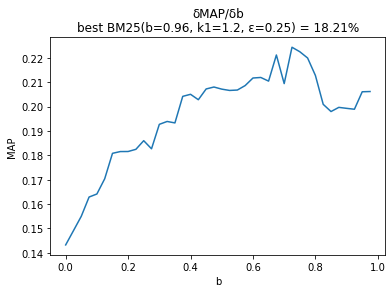

In [43]:
plt.plot(X.keys(), X.values())
plt.title("δMAP/δb\nbest BM25(b=0.96, k1=1.2, ε=0.25) = 18.21%")
plt.xlabel("b")
plt.ylabel("MAP")

## With Changing k1 (0.1, 5, 0.1)

In [44]:
X = {x:None for x in np.arange(0.1, 5, 0.5)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######


    print("epsilon =", var, end=" ")
    bm25 = BM25Okapi(tokenized_corpus, k1=var, b=0.725, epsilon=0.01)
    sum = 0
    for Q in query_index:
        doc_scores = bm25.get_scores(query[Q])
        sum += average_precision(doc_scores, answers[Q])
    MeanAP = sum/len(query_index)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)
    
    
    # show results 
    t1 = time.time() ######
    print(f"took {(t1-t0)} seconds") ######
    print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min") ######
    print(f"total elapsed time = {(t1-t00)} seconds\n") ######

epsilon = 0.1 -> MeanAP = 0.14692899667164477
took 28.007737636566162 seconds
average time taken per file = 28.007737636566162 seconds
percentage done = 10.0%
estimated time remaining = 252.06963872909546 sec = 4.201160645484924 min
total elapsed time = 28.007737636566162 seconds

epsilon = 0.6 -> MeanAP = 0.17732931622112677
took 28.74072027206421 seconds
average time taken per file = 28.374228954315186 seconds
percentage done = 20.0%
estimated time remaining = 226.99383163452148 sec = 3.783230527242025 min
total elapsed time = 56.74845790863037 seconds

epsilon = 1.1 -> MeanAP = 0.1889485133556634
took 26.652719259262085 seconds
average time taken per file = 27.800392389297485 seconds
percentage done = 30.0%
estimated time remaining = 194.6027467250824 sec = 3.2433791120847064 min
total elapsed time = 83.40117716789246 seconds

epsilon = 1.6 -> MeanAP = 0.18576004158990642
took 25.963233709335327 seconds
average time taken per file = 27.341102719306946 seconds
percentage done = 40.0%

In [45]:
a = list(X.keys())
m = max(X.values())
print(f"best BM25(k1 = {a[list(X.values()).index(m)]}) = {m*100}%")

best BM25(k1 = 3.6) = 22.109345857960562%


Text(0, 0.5, 'MAP')

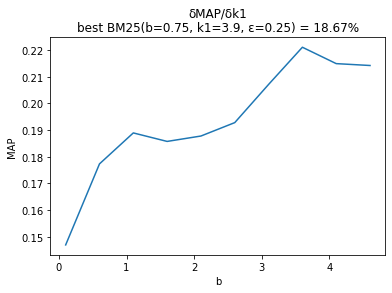

In [46]:
plt.plot(X.keys(), X.values())
plt.title(f"δMAP/δk1\nbest BM25(b=0.75, k1=3.9, ε=0.25) = 18.67%")
plt.xlabel("b")
plt.ylabel("MAP")

## With Changing epsilon (0.1, 2, 0.1)

In [38]:
X = {x:None for x in np.arange(0, 1, 0.1)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######


    print("epsilon =", var, end=" ")
    bm25 = BM25Okapi(tokenized_corpus, k1=3.9, b=0.96, epsilon=var)
    sum = 0
    for Q in query_index:
        doc_scores = bm25.get_scores(query[Q])
        sum += average_precision(doc_scores, answers[Q])
    MeanAP = sum/len(query_index)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)
    
    
    # show results 
    t1 = time.time() ######
    print(f"took {(t1-t0)} seconds") ######
    print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min") ######
    print(f"total elapsed time = {(t1-t00)} seconds\n") ######

epsilon = 0.0 -> MeanAP = 0.2053936219824716
took 29.125900983810425 seconds
average time taken per file = 29.125900983810425 seconds
percentage done = 10.0%
estimated time remaining = 262.1331088542938 sec = 4.3688851475715635 min
total elapsed time = 29.125900983810425 seconds

epsilon = 0.1 -> MeanAP = 0.1946189779705794
took 28.287304878234863 seconds
average time taken per file = 28.706602931022644 seconds
percentage done = 20.0%
estimated time remaining = 229.65282344818115 sec = 3.827547057469686 min
total elapsed time = 57.41320586204529 seconds

epsilon = 0.2 -> MeanAP = 0.18928497048759294
took 32.02809810638428 seconds
average time taken per file = 29.81376798947652 seconds
percentage done = 30.0%
estimated time remaining = 208.69637592633566 sec = 3.478272932105594 min
total elapsed time = 89.44130396842957 seconds

epsilon = 0.30000000000000004 -> MeanAP = 0.1809059061128426
took 35.050408124923706 seconds
average time taken per file = 31.122928023338318 seconds
percentage

In [39]:
a = list(X.keys())
m = max(X.values())
highest = round(a[list(X.values()).index(m)], 2)
print(f"best BM25(epsilon = {highest}) = {m*100}%")

best BM25(epsilon = 0.0) = 20.53936219824716%


Text(0, 0.5, 'MAP')

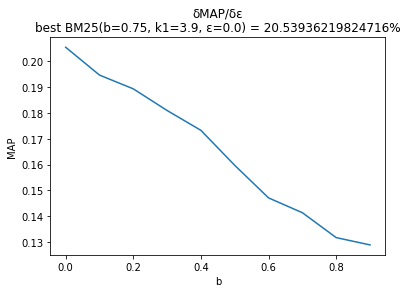

In [40]:
plt.plot(X.keys(), X.values())
plt.title(f"δMAP/δε\nbest BM25(b=0.75, k1=3.9, ε={highest}) = {m*100}%")
plt.xlabel("b")
plt.ylabel("MAP")

In [31]:
X = {a: b for a, b in X.items() if b}